Summary:
The main motive of the research is to develop a regression model based on the kc_house.csv. Here we did linear regression, histogram, and plotting some diagram with the help of the dataset.


Why linear and where linear regression is used?

Linear regression is mainly used for analyzing and predict the value of the variable which is based on the overall value of another variable. All of the variable that have been predicted is called dependent variable.


Linear regression is used to predict modeling and analysis. The variable is used for predicting other variables value which is called independent variable.


Such as it used for medical researchers which often use linear regression for understanding the relationship between drug and blood pressure of patients, estimate price of a house, real estate investor, or an estimator. 


Business Problem:

From this product and linear regression, it is very easy to understand the house price with different needs of the real estate investor. In this project the customer is real estate investor and user is estimator or could be house buyer who can determine the price guide.
1) how house price is increased due to its different attributes.
2) is it good idea to buy a old house and doing renovation (adding different attributes) to increase house value!
3) what are main key attaributes takes part of changing house price?

In [1]:
#Importing libraries, os and modules
import numpy as np 
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The dataset has been imported and the head of the dataset had been seen in the above image. There are many variables by which the regression model can establish.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Data set Information!

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Here in the above image, the dataset has been described as the above measurement can be seen from it.

In [5]:
#Drop scientific notification
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


Here the above image shows the function used to drop the scientific notation that exists in this dataset. The data description has been shown without any scientific notation.

<AxesSubplot:>

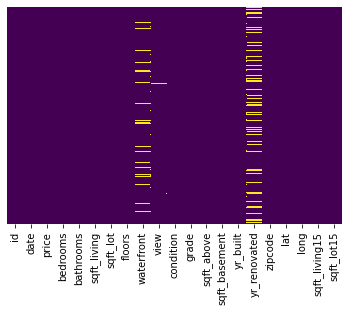

In [7]:
#Checking null value
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

Here as it can be seen in the waterfront and yr. renovated there is some null value consistent in this dataset. The null value was shown in a plot for a clear view for the viewers.

In [8]:
df['bathrooms'].value_counts()

2.500    5377
1.000    3851
1.750    3048
2.250    2047
2.000    1930
1.500    1445
2.750    1185
3.000     753
3.500     731
3.250     589
3.750     155
4.000     136
4.500     100
4.250      79
0.750      71
4.750      23
5.000      21
5.250      13
5.500      10
1.250       9
6.000       6
5.750       4
0.500       4
8.000       2
6.250       2
6.750       2
6.500       2
7.500       1
7.750       1
Name: bathrooms, dtype: int64

In [9]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [11]:
df['floors'].value_counts()

1.000    10673
2.000     8235
1.500     1910
3.000      611
2.500      161
3.500        7
Name: floors, dtype: int64

C:\Users\ sapnadipu\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

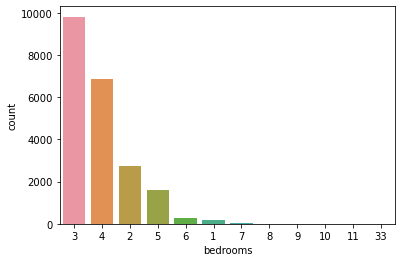

In [12]:
#showing countplot
sns.countplot(df.bedrooms, order = df['bedrooms'].value_counts().index)


The above image describes the count plot between count and bedrooms.

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'House prices by condition'}, xlabel='condition', ylabel='price'>

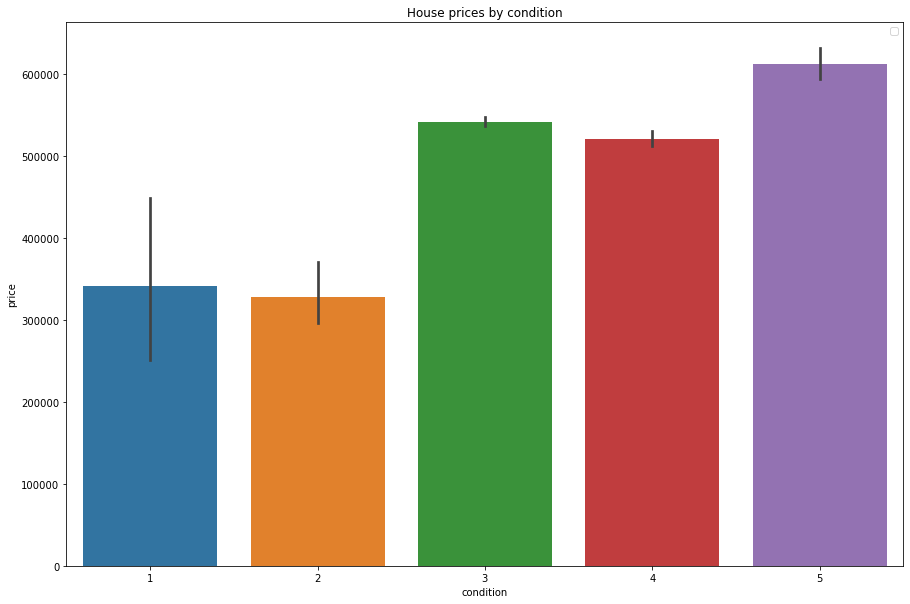

In [13]:
#showing subplot House prices by condition 
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by condition')
plt.xlabel('condition')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='condition', y='price', data = df)

The above image shows the bar graph against the condition and price. It can be understood from the above image that with great condition the price of house also increased.

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'House prices by view'}, xlabel='view', ylabel='price'>

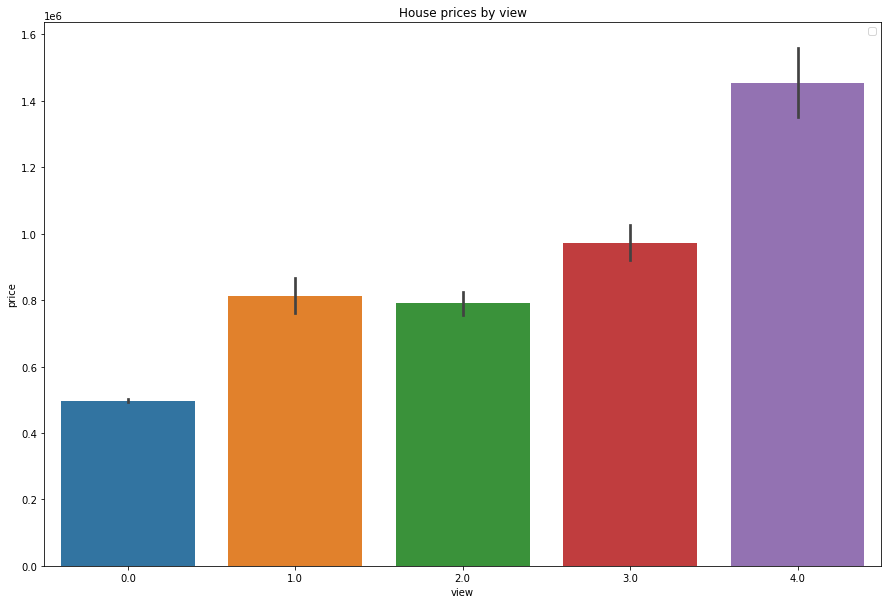

In [14]:
#showing subplot House prices by view
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by view')
plt.xlabel('view')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='view', y='price', data = df)

The above image shows the bar graph against the view and price. It can be understood from the above image that with great view the price of house also increased.

C:\Users\ sapnadipu\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ sapnadipu\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([19075.,     0.,     0.,     0.,   146.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

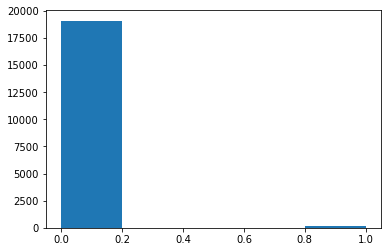

In [15]:
#histogram
plt.hist('waterfront', data = df, bins = 5)

Here the above function is used to show the histogram of the waterfront. 

C:\Users\ sapnadipu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='waterfront', ylabel='Density'>

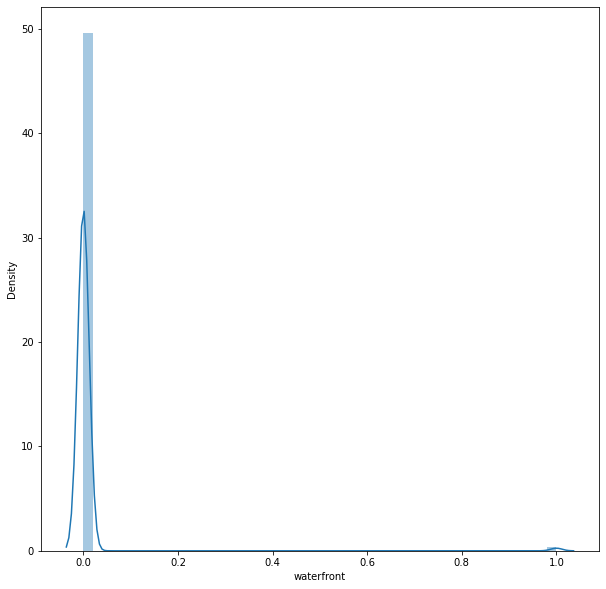

In [16]:
#subplot
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10))
sns.distplot(df['waterfront'], hist=True, kde=True, rug=False, label='waterfront', norm_hist=True)

Here the above function is used to show the subplot between the density and waterfront. Here it shows the density is too high for no waterfront and low for a single waterfront.

C:\Users\ sapnadipu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

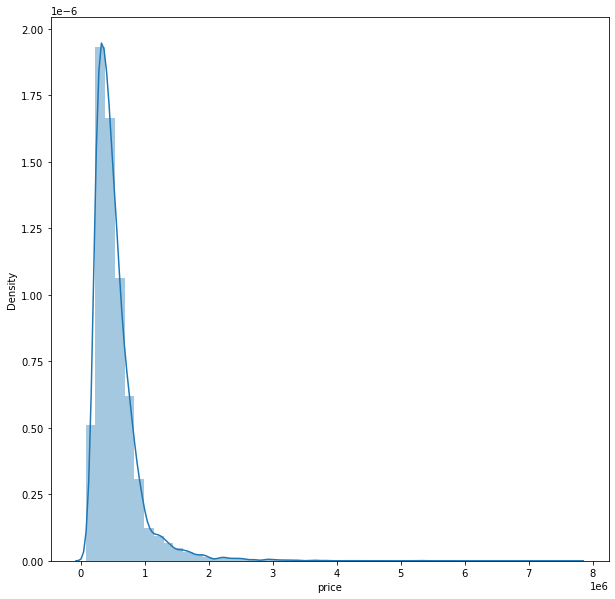

In [17]:
#subplot
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10))
sns.distplot(df['price'], hist=True, kde=True, rug=False, label='price', norm_hist=True)

The above function is used to show the subplot between density and price.

In [18]:
#mean median mode
print('Mean', round(df['price'].mean(), 2))
print('Median', df['price'].median())
print('Mode', df['price'].mode()[0])

Mean 540296.57
Median 450000.0
Mode 350000.0


Mean median and mode have been shown with the above function. Here this value shows the mean is greater than the median and the median greater than the mode.

In [19]:
len(df[df['sqft_living']==1300])

138

Here with the above function, it can be understood that 138 houses have 1300 sqft.

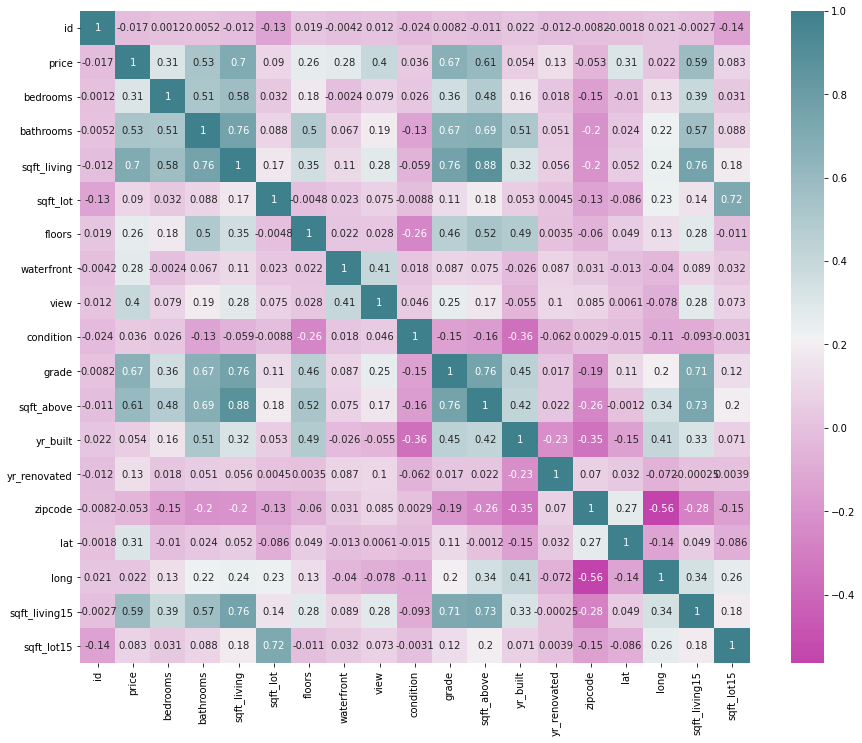

In [20]:
def correlation_heatmap(df1):
    _, ax = plt.subplots(figsize = (15, 12))
    colormap= sns.diverging_palette(320, 210, as_cmap = True)
    sns.heatmap(df.corr(), annot=True, cmap = colormap)

correlation_heatmap(df)

A correlation heatmap is shown with all of the data. 
with the correlation matrix it can be observed that the price has the better
correlation coefficient with the living area(sqft)(0.7)
we use the living area as feature when create
regression after the model of the linear relationship among
response and explanatory variable.


In [21]:
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)
reg = linear_model.LinearRegression()
x_train = np.array(train_data['sqft_living']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1, 1)
reg.fit(x_train, y_train)
#evaluate simple model
x_test = np.array(test_data['sqft_living']).reshape(-1, 1)
y_test = np.array(test_data['price']).reshape(-1, 1)
pred = reg.predict(x_test)
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train, y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Simple Model
Mean Squared Error (MSE)  271171.89
R-squared (training)  0.499
R-squared (testing)  0.467
Intercept:  [-43739.61859471]
Coefficient: [[281.48917629]]


There a simple linear regression have been used which found to be poor fit for improving we add more feature.
The dataset is split here between train and test data where the mean squared error, intercept and coefficient have been shown.

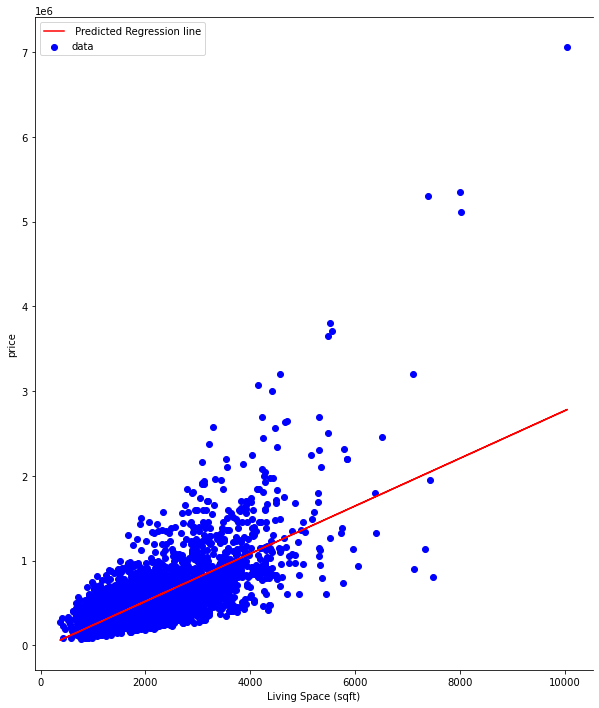

In [22]:
_, ax = plt.subplots(figsize= (10, 12))
plt.scatter(x_test, y_test, color= 'blue', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Here a linear regression has been used with the above function and found to be a poor fit. For improving the model there are more features need to be added.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

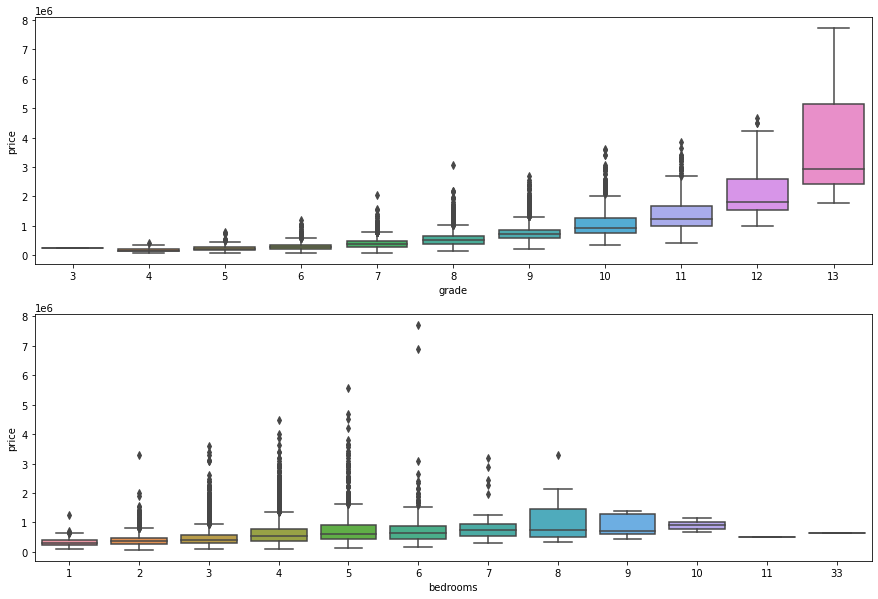

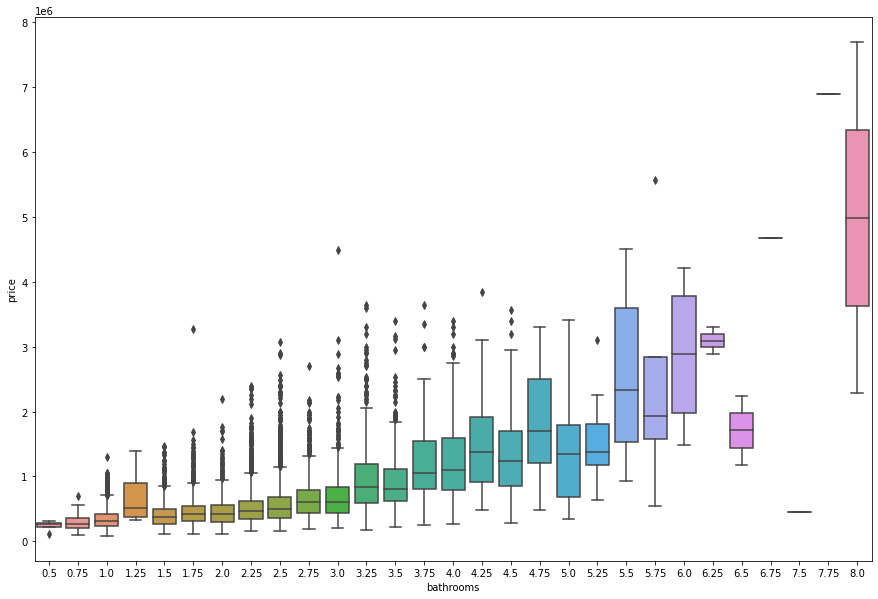

In [23]:
_ , axes = plt.subplots(2, 1, figsize=(15,10))
sns.boxplot(x= train_data['grade'], y=train_data['price'],ax = axes[0])
sns.boxplot(x=train_data['bedrooms'], y=train_data['price'], ax=axes[1])

_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'], y=train_data['price'])

Subplot between price and grade; price and bedrooms; price and bathrooms

In [24]:
features1 = ['bedrooms','bathrooms','floors','sqft_living','sqft_lot']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  267618.55
R-squared (training)  0.516
R-squared (testing)  0.481
Intercept:  81646.21950730233
Coefficient: [-6.07847356e+04  7.78281510e+03 -7.43090908e+02  3.15171673e+02
 -3.92620015e-01]


We have a slight increased R-squared Value in testing phase then our previous model! 

In [25]:
features2 = ['bedrooms','bathrooms','floors','sqft_living','sqft_lot','grade','condition','floors']
reg= linear_model.LinearRegression()
reg.fit(train_data[features2],train_data['price'])
pred = reg.predict(test_data[features2])
print('Complex Model_2a')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features2], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features2], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2a
Mean Squared Error (MSE)  254113.57
R-squared (training)  0.565
R-squared (testing)  0.532
Intercept:  -722723.7085875797
Coefficient: [-4.59725630e+04 -1.01601988e+04 -1.09692667e+04  2.21909779e+02
 -3.40740008e-01  1.05107791e+05  6.21608525e+04 -1.09692667e+04]


In [26]:
#Polynomial regression
polyfeat = PolynomialFeatures(degree =2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  253975.25
R-squared (training)  0.565
R-squared (testing)  0.533


 In the above polynominal regression model we can see our R-squared incresed again but it is not a significant %!

In [27]:
polyfeat = PolynomialFeatures(degree =3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Complex Model_4')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_4
Mean Squared Error (MSE)  275609.77
R-squared (training)  0.576
R-squared (testing)  0.45


In the above model our training R-squared % incrased but testing phase it is decresed then previous model! Also Mean squared error increased!

Theory: in our model 3 and 2a r-squared number slightly increased but they number i was looking around 70% above but some reason this model unable to reach that far! Even though we can see that price can increse based on those used variables but we can only predict 53.3% correctly and rest of the 46.7% reason we dont know! Which means we might need more relevent data! 

Brief findings: 
From the given dataset we can see that there are multiple variables can influence the price!
There are 18 different variables can influence the price with other different many variables which we don’t have the data or questions yet!
From the correlation heatmap we can see which the variables have more influences on the price!
Below I have given a list of the variables have more influences on the price-
-bedrooms, bathrooms, floors, sqft_living, sqft_lot', grade, condition, floors….
We want built few models which can tell us which are the variable influences most to predict price! The end user will buyers/ property value estimators but our real estate company (our client here can guide them!
Some of the data from buyers might have helped to improve this model! few of the questions could be= what is the family size? What is the purpose of buying the property investment or live in? income of household?
Those are answers could help to determine more affordability and that might help me to get the model improved a lot!


Conclusion:
In the conclusion by adding more variables shows our model improves! however it is very hard to determine very perfect price as price depends on other variables like economy, countries current GDP and cash rate etc! Currently happening in Australia for example! House price is going down due to bank interest rate is increasing!

                                              Thanks
                                             